# Importing Libraries


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import warnings
warnings.filterwarnings('ignore')


# Importing Dataset


In [12]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
X = df.iloc[:, [3, 4]].values


# Silhouette Analysis


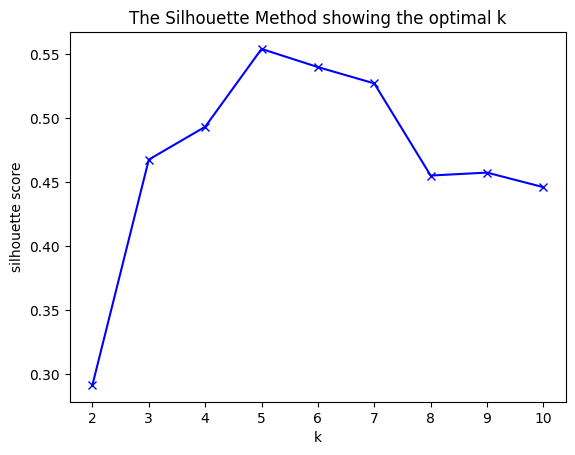

In [14]:
K = range(2, 11)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_pred))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()


# Elbow Method


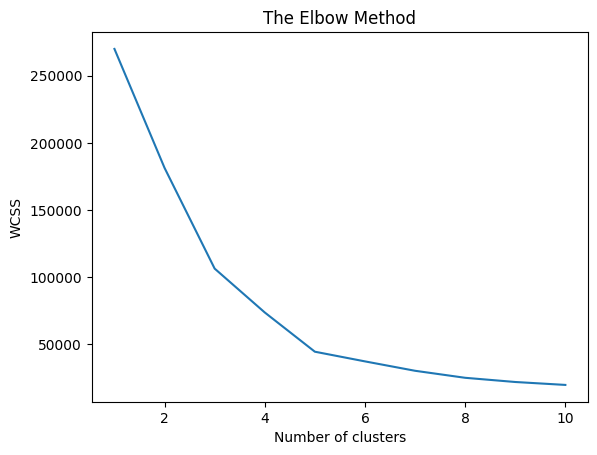

In [15]:
wcss = []
K = range(1, 11)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Hierarchical Clustering (Agglomerative) FROM SCRATCH


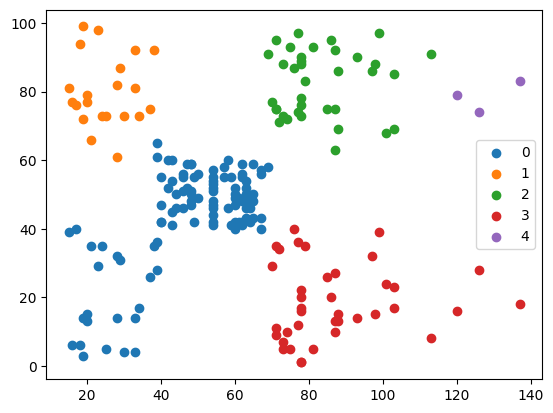

In [16]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


class AgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.clusters = [[sample] for sample in X]
        self.centroids = []

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize centroids
        for cluster in self.clusters:
            self.centroids.append(np.mean(cluster, axis=0))

        # merge clusters
        while len(self.clusters) > self.n_clusters:
            # calculate distances between centroids
            distances = []
            for i in range(len(self.centroids)):
                for j in range(i+1, len(self.centroids)):
                    distances.append(
                        (euclidean_distance(self.centroids[i], self.centroids[j]), i, j))

            # get the closest clusters
            distances = sorted(distances, key=lambda x: x[0])
            closest_distance, idx1, idx2 = distances[0]

            # merge clusters
            merged_cluster = self.clusters[idx1] + self.clusters[idx2]
            self.clusters[idx1] = merged_cluster

            # remove one of the merged clusters
            self.clusters.pop(idx2)

            # update centroids
            self.centroids = []
            for cluster in self.clusters:
                self.centroids.append(np.mean(cluster, axis=0))

    def plot_clusters(self):
        for idx, cluster in enumerate(self.clusters):
            cluster = np.array(cluster)
            plt.scatter(cluster[:, 0], cluster[:, 1], label=idx)
        plt.legend()
        plt.show()


ac = AgglomerativeClustering(n_clusters=5)
ac.fit(X)
ac.plot_clusters()


# Hierarchical Clustering (Agglomerative) using Scipy Library.


In [17]:
class AgglomerativeClustering:
    def __init__(self, method='single', n_clusters=2):
        self.method = method
        self.n_clusters = n_clusters
        self.clusters = None

    def fit(self, X):
        # generate linkage matrix using selected method
        linkage_matrix = linkage(X, method=self.method)

        # generate clusters from linkage matrix
        self.clusters = fcluster(
            linkage_matrix, t=self.n_clusters, criterion='maxclust')

    def plot_dendrogram(self, X):
        # generate linkage matrix using selected method
        linkage_matrix = linkage(X, method=self.method)

        # plot dendrogram
        dendrogram(linkage_matrix)
        plt.show()

    def plot_clusters(self, X):
        plt.scatter(X[:, 0], X[:, 1], c=self.clusters, cmap='rainbow')
        plt.show()


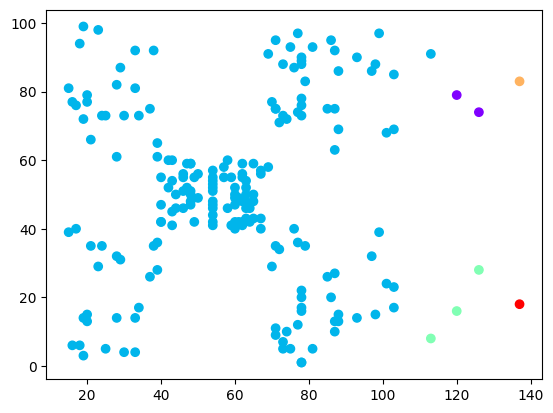

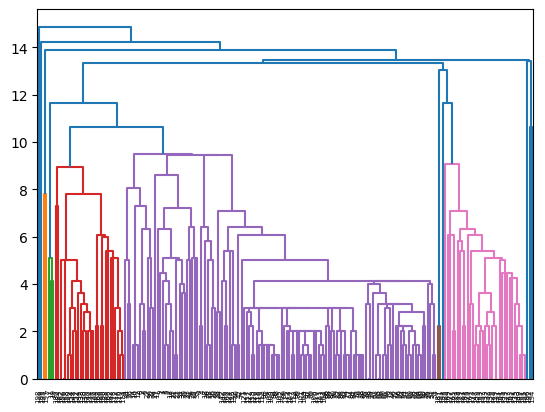

In [18]:
ac = AgglomerativeClustering(method='single', n_clusters=5)
ac.fit(X)
ac.plot_clusters(X)
ac.plot_dendrogram(X)


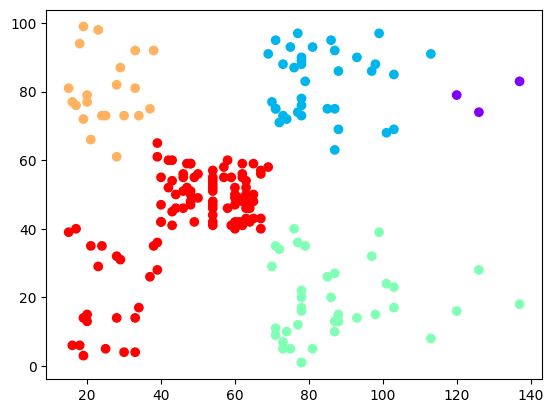

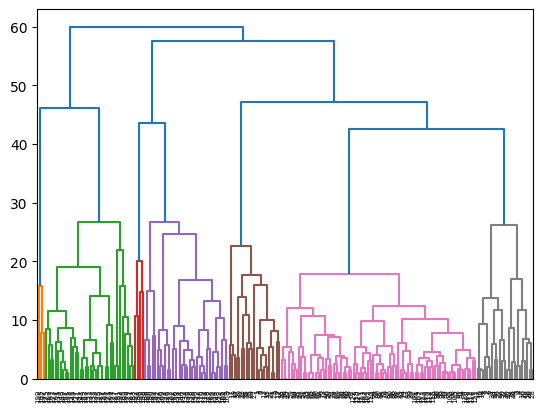

In [19]:
ac = AgglomerativeClustering(method='average', n_clusters=5)
ac.fit(X)
ac.plot_clusters(X)
ac.plot_dendrogram(X)


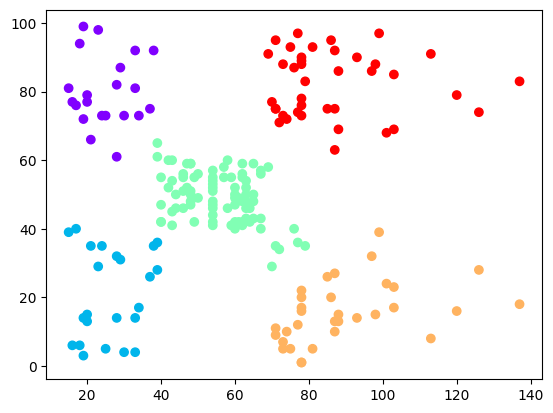

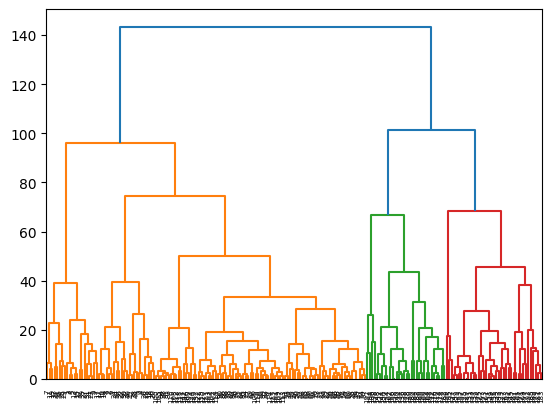

In [20]:
ac = AgglomerativeClustering(method='complete', n_clusters=5)
ac.fit(X)
ac.plot_clusters(X)
ac.plot_dendrogram(X)
